# 📊 K-Means Clustering on the Iris Dataset

This notebook will guide you step-by-step through:
1. Data Preprocessing
2. Data Visualization
3. Applying the Elbow Method to choose K
4. Running K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

def match_clusters_to_labels(true_labels, cluster_labels):
    labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        most_common = mode(true_labels[mask], keepdims=True)[0][0]
        labels[mask] = most_common
    return labels

In [2]:
## 🌸 Step 2: Load and Explore the Iris Dataset

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
## 🧹 Step 3: Data Preprocessing

# We'll standardize the features to have mean=0 and std=1
features = df.drop('target', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

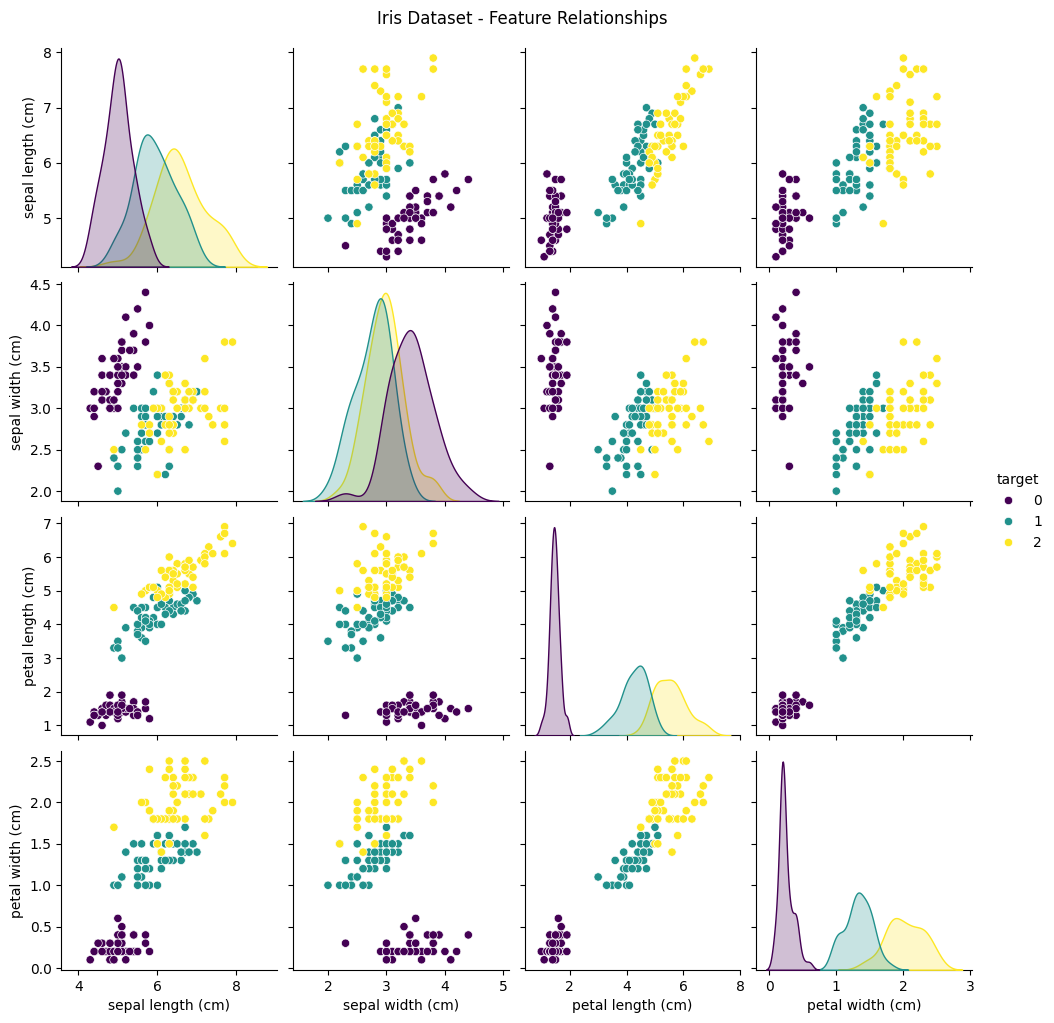

In [4]:
## 📈 Step 4: Data Visualization

# Pairplot of the original features colored by species
sns.pairplot(df, hue='target', palette='viridis')
plt.suptitle("Iris Dataset - Feature Relationships", y=1.02)
plt.show()

c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

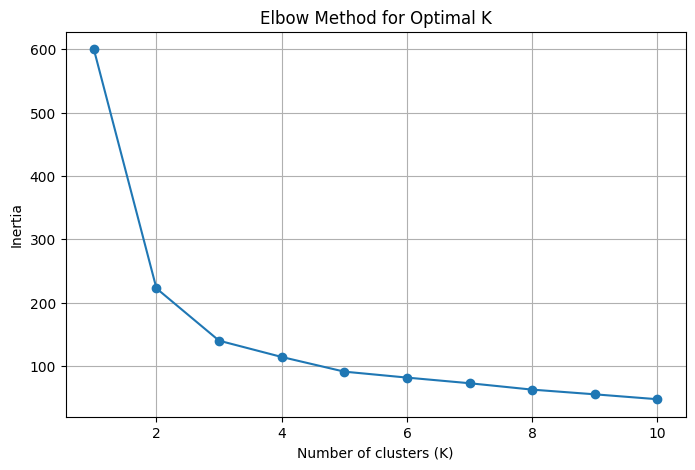

In [5]:
## 🧮 Step 5: Elbow Method to Choose K

# Try K values from 1 to 10
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

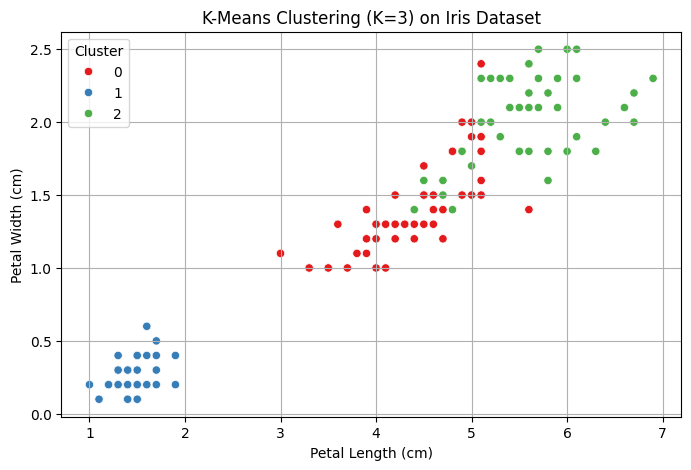

🔗 Method: KMeans | ARI: 0.620


In [6]:
## 🤖 Step 6: Apply K-Means with K=3

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_features)
df['cluster'] = kmeans.labels_

# ---

## 🌈 Step 7: Visualize Clusters

# Use petal length and petal width for visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['cluster'], palette='Set1')
plt.title('K-Means Clustering (K=3) on Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

labels_Kmeans = match_clusters_to_labels(df['target'].values, kmeans.labels_)
ari = adjusted_rand_score(df['target'].values, labels_Kmeans)

print(f"🔗 Method: KMeans | ARI: {ari:.3f}")

## ✅ Summary

- We standardized the data for better clustering performance.
- Used the Elbow Method to find the optimal number of clusters (K ≈ 3).
- Applied K-Means and visualized the resulting clusters.
- The clustering aligns fairly well with the actual species in the Iris dataset.